<a href="https://colab.research.google.com/github/hatalsky/Python_Class_DATA201/blob/main/Python_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')
df.shape

(212331, 15)

In [4]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [5]:
#checking to see missing data
df.isnull().sum()

School DBN                      0
School Name                     0
School Level                    0
Regents Exam                   10
Year                            0
Total Tested                    0
Mean Score                      0
Number Scoring Below 65         0
Percent Scoring Below 65        0
Number Scoring 65 or Above      0
Percent Scoring 65 or Above     0
Number Scoring 80 or Above      0
Percent Scoring 80 or Above     0
Number Scoring CR               0
Percent Scoring CR              0
dtype: int64

In [6]:
#need to handle non-standard missing values 's' 'na'
missing_values = ["s", "na"]
df_clean = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', na_values = missing_values)
df_clean.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#filter dataset to just those observations that have complete data - note this likely limits the data set to large schools testing large numbers of kids
df_clean.dropna(thresh=15, inplace=True)
df_clean.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1.0,2.0,48.0,98.0,23.0,46.9,48.0,98.0
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0,9.0,17.6,42.0,82.4,33.0,64.7,40.0,78.4
10,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8,0.0,0.0,51.0,100.0,44.0,86.3,50.0,98.0
12,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9,14.0,60.9,9.0,39.1,0.0,0.0,2.0,8.7
13,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2016,22,69.0,6.0,27.3,16.0,72.7,2.0,9.1,15.0,68.2


In [8]:
df_clean.shape

(69643, 15)

This narrows the data set from more than 200,000 observations to closer to 70,000

In [9]:
df_clean.isnull().sum()

School DBN                     0
School Name                    0
School Level                   0
Regents Exam                   0
Year                           0
Total Tested                   0
Mean Score                     0
Number Scoring Below 65        0
Percent Scoring Below 65       0
Number Scoring 65 or Above     0
Percent Scoring 65 or Above    0
Number Scoring 80 or Above     0
Percent Scoring 80 or Above    0
Number Scoring CR              0
Percent Scoring CR             0
dtype: int64

In [10]:
#now there is no missing data, but we still need an index
df_clean = df_clean.reset_index()
df_clean['index'].is_unique

True

In [11]:
df_clean.head()

,index,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1.0,2.0,48.0,98.0,23.0,46.9,48.0,98.0
1,9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0,9.0,17.6,42.0,82.4,33.0,64.7,40.0,78.4
2,10,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8,0.0,0.0,51.0,100.0,44.0,86.3,50.0,98.0
3,12,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9,14.0,60.9,9.0,39.1,0.0,0.0,2.0,8.7
4,13,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2016,22,69.0,6.0,27.3,16.0,72.7,2.0,9.1,15.0,68.2


In [12]:
#choosing a school as a starting point - decided Brooklyn Technical High School (DBN = 13K430) - nation's largest high school
BTHS_df = df_clean[df_clean['School Name'].str.contains('Brooklyn Technical')]
BTHS_df.shape

(182, 16)

There are 182 observations of test performance in Brooklyn Technical High School

In [26]:
BTHS_df.groupby(['Regents Exam'])['Mean Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Regents Exam,,,,,,,,
Algebra2/Trigonometry,24.0,76.845833,5.927092,65.0,74.900,76.95,82.000,84.6
Common Core Algebra,31.0,83.938710,3.639018,74.8,80.750,84.90,87.200,88.8
Common Core Algebra2,24.0,81.337500,2.190456,74.3,80.950,81.55,82.925,84.0
Common Core English,34.0,92.035294,1.281070,87.7,91.525,92.25,93.000,94.4
Common Core Geometry,35.0,82.391429,2.644903,70.8,82.000,83.10,84.050,85.0
English,14.0,87.792857,1.657368,84.2,87.825,88.30,88.500,90.3
Geometry,11.0,86.281818,2.163709,81.1,85.450,86.80,87.500,88.9
Integrated Algebra,9.0,89.622222,1.493969,88.0,88.800,89.40,89.900,92.7


<Axes: xlabel='Regents Exam'>

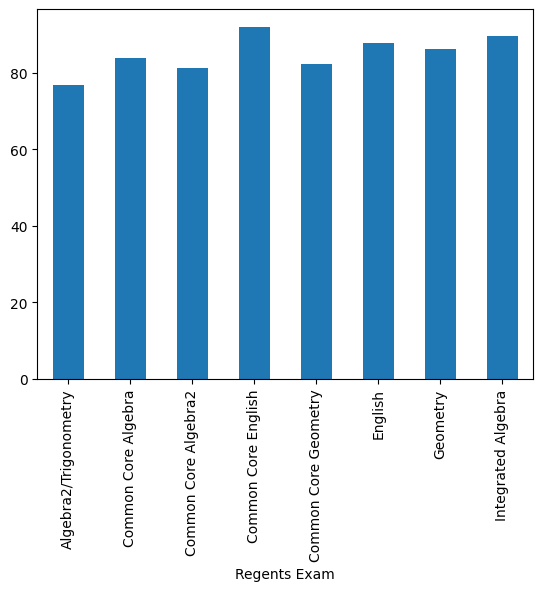

In [14]:
BTHS_df.groupby(['Regents Exam'])['Mean Score'].mean().plot(kind='bar')

In [15]:
#descriptive statisitics of test performance (via mean score) sorted by test type
df_clean.groupby(['Regents Exam'])['Mean Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Regents Exam,,,,,,,,
Algebra2/Trigonometry,5432.0,56.370471,13.338280,19.1,47.175,55.3,64.4,95.2
Common Core Algebra,19549.0,67.489718,9.889342,37.2,60.300,66.2,74.2,96.6
Common Core Algebra2,4358.0,63.585865,9.313523,33.6,57.100,63.5,69.7,90.9
Common Core English,13319.0,70.379300,11.856841,15.0,63.400,71.4,78.4,98.3
Common Core Geometry,9546.0,59.111481,10.100504,27.0,52.000,58.0,65.6,92.1
English,6784.0,65.769015,9.982544,30.7,58.975,66.0,72.1,95.1
Geometry,4347.0,61.881504,10.742855,29.0,54.300,61.3,68.9,95.1
Integrated Algebra,6308.0,64.814933,7.065440,36.7,60.300,64.4,68.8,95.9


<Axes: xlabel='Regents Exam'>

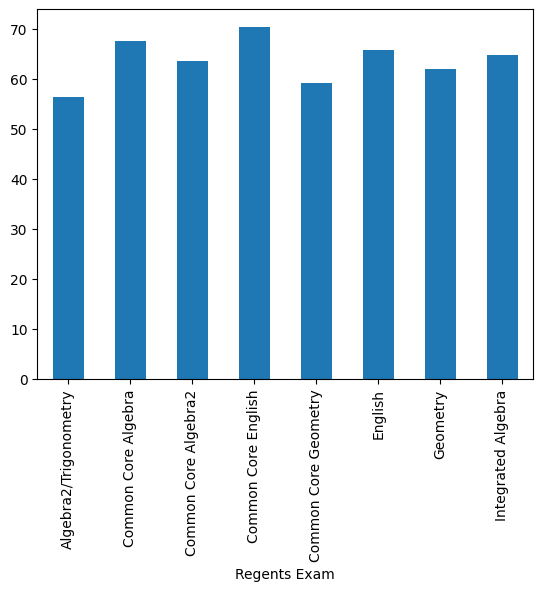

In [16]:
df_clean.groupby(['Regents Exam'])['Mean Score'].mean().plot(kind='bar')

<ipython-input-25-9b51f6253b76>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTHS_df['hue']='Brooklyn Tech'


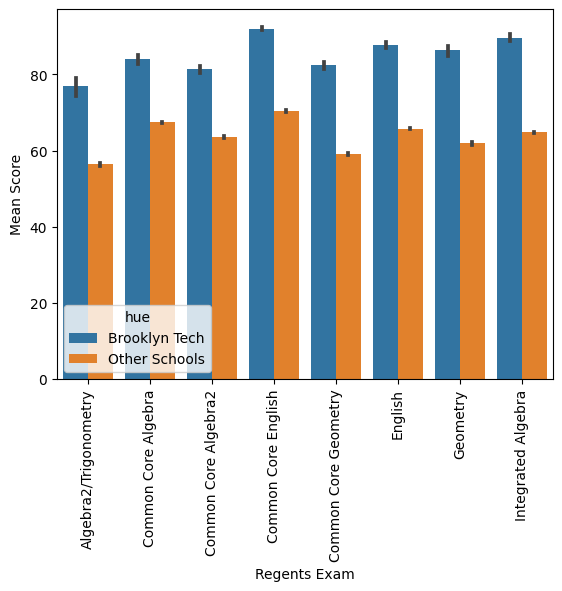

In [25]:
#combining bar chart data on average scores from BTHS v others

import seaborn as sns
import matplotlib.pyplot as plt
BTHS_df['hue']='Brooklyn Tech'
df_clean['hue']='Other Schools'
res=pd.concat([BTHS_df,df_clean])
sns.barplot(x='Regents Exam',y='Mean Score',data=res,hue='hue')
plt.xticks(rotation=90)
plt.show()

Brooklyn Technical High School outperforms the average performance of other schools in NYC (excluding schools that were omitted from the data set because of incomplete/missing data).

*  Strongest scores across NYC occur in Common Core English with an average score just over 70. But BTHS average score on the same test is more than 92.
*Weakest test scores at BTHS were in Algebra2/Trig averaging 76.8. But this is still substantially higher than performance throughout NYC on the same test where the average for Algebra2/Trig was 56.3.

